In [ ]:
import pandas as pd
data = pd.read_csv('/content/nifty50.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3718 non-null   object 
 1   Open      3718 non-null   float64
 2   High      3718 non-null   float64
 3   Low       3718 non-null   float64
 4   Close     3718 non-null   float64
 5   Volume    3718 non-null   int64  
 6   Turnover  3718 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 203.5+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna()
data.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2008-01-21,5705.00,5705.00,4977.10,5208.80,211347217,1.258909e+11
1,2008-01-22,5203.35,5203.35,4448.50,4899.30,200603284,1.156541e+11
2,2008-01-23,4903.05,5328.05,4891.60,5203.40,172729968,1.002930e+11
3,2008-01-24,5208.00,5357.20,4995.80,5033.45,145355769,8.302420e+10
4,2008-01-25,5035.05,5399.25,5035.05,5383.35,105876191,6.228840e+10


In [ ]:
data = data.sort_values('Date')

In [ ]:
prices = data['Close'].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

In [ ]:
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_prices)):
    X.append(scaled_prices[i-sequence_length:i, 0])
    y.append(scaled_prices[i, 0])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# 80% training, 20% testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# LSTM model

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
# model training
model.fit(X_train, y_train, batch_size=32, epochs=20)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 2.6932e-04
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 2.8077e-04
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 2.6940e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - loss: 2.2689e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 2.1987e-04
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 2.5394e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 2.3529e-04
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 2.4701e-04
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 2.4873e-04
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 2.4355e-04
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 2.6599e-04
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 2.5988e-04
Epoch 13/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.3746e-04
Epoch 14/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 2.7047e-04
Epoch 

In [ ]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
len(predicted_prices)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


732

In [ ]:
# Inverse transform y_test to get actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


array([[12113.45],
       [12045.8 ],
       [11992.5 ],
       [12125.9 ],
       [12080.85],
       [11829.4 ],
       [11797.9 ],
       [11678.5 ],
       [11633.3 ],
       [11201.75],
       [11132.75],
       [11303.3 ],
       [11251.  ],
       [11269.  ],
       [10989.45],
       [10451.45],
       [10458.4 ],
       [ 9590.15],
       [ 9955.2 ],
       [ 9197.4 ],
       [ 8967.05],
       [ 8468.8 ],
       [ 8263.45],
       [ 8745.45],
       [ 7610.25],
       [ 7801.05],
       [ 8317.85],
       [ 8641.45],
       [ 8660.25],
       [ 8281.1 ],
       [ 8597.75],
       [ 8253.8 ],
       [ 8083.8 ],
       [ 8792.2 ],
       [ 8748.75],
       [ 9111.9 ],
       [ 8993.85],
       [ 8925.3 ],
       [ 8992.8 ],
       [ 9266.75],
       [ 9261.85],
       [ 8981.45],
       [ 9187.3 ],
       [ 9313.9 ],
       [ 9154.4 ],
       [ 9282.3 ],
       [ 9380.9 ],
       [ 9553.35],
       [ 9859.9 ],
       [ 9293.5 ],
       [ 9205.6 ],
       [ 9270.9 ],
       [ 919

In [ ]:
# Evaluate the model
mse = np.mean((actual_prices - predicted_prices) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 277872.43499538745


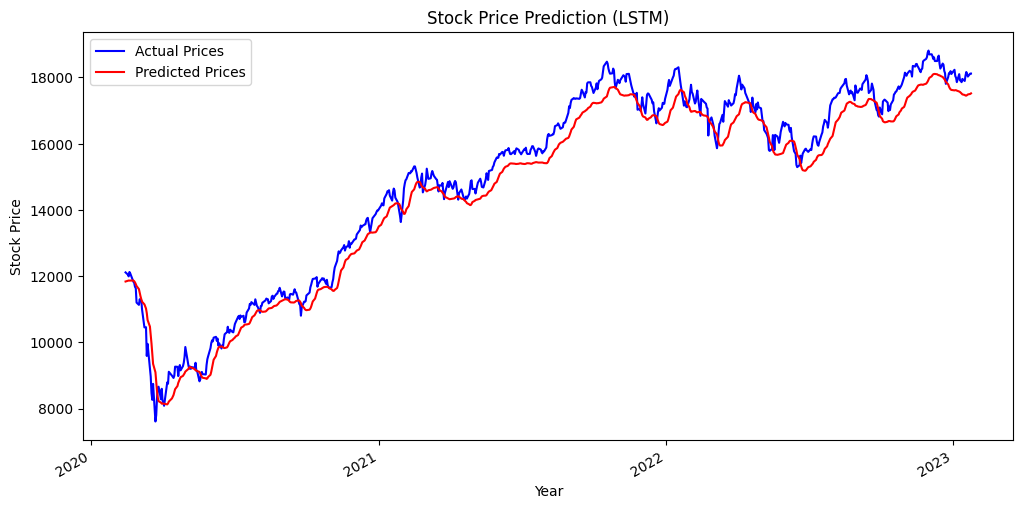

In [64]:
# import matplotlib.dates as mdates

# Generate corresponding dates for the test set
test_dates = data['Date'].iloc[-len(y_test):]

# Plot predictions vs actual with x-axis as years
plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction (LSTM)')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()

# Format the x-axis to display years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
mse = np.mean((actual_prices - predicted_prices) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 277872.43499538745


In [58]:
# Predict future stock prices for 3 years (750 trading days)
future_days = 750
future_predictions = []

# Last 60 days of data
last_sequence = scaled_prices[-sequence_length:]

for _ in range(future_days):
    # Reshape to  LSTM model
    input_sequence = last_sequence.reshape(1, sequence_length, 1)

    next_price = model.predict(input_sequence)

    future_predictions.append(next_price[0, 0])

    last_sequence = np.append(last_sequence[1:], next_price[0, 0])


future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

import datetime as dt
last_date = data['Date'].iloc[-1]
future_dates = [last_date + dt.timedelta(days=i) for i in range(1, future_days + 1)]+-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

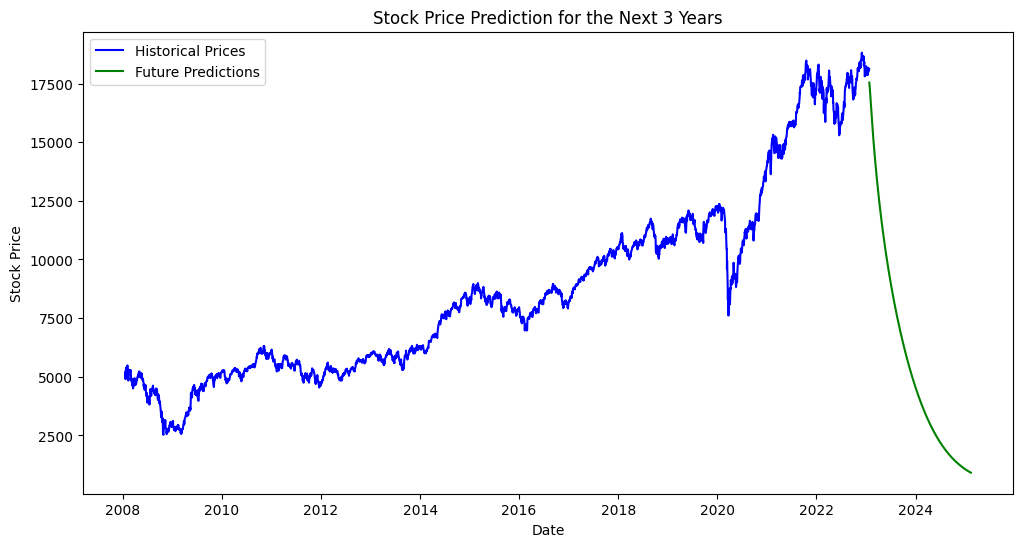

In [57]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], prices, label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green')
plt.title('Stock Price Prediction for the Next 3 Years')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()